# Importing Dependencies

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Collection/Cleaning/Preprocessing/Visualizations

In [4]:
spy = yf.Ticker("SPY")

In [ ]:
history = spy.history(period="1mo", interval="1d")

In [22]:
history['Date'] = pd.to_datetime(history['Date'])
history.reset_index(inplace=True)

In [23]:
history

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,0,2024-01-08 00:00:00-05:00,468.429993,474.750000,468.299988,474.600006,74879100,0.0,0.0,0.0
1,1,2024-01-09 00:00:00-05:00,471.869995,474.929993,471.350006,473.880005,65931400,0.0,0.0,0.0
2,2,2024-01-10 00:00:00-05:00,474.160004,477.450012,473.869995,476.559998,67310600,0.0,0.0,0.0
3,3,2024-01-11 00:00:00-05:00,477.589996,478.119995,472.260010,476.350006,77940700,0.0,0.0,0.0
4,4,2024-01-12 00:00:00-05:00,477.839996,478.600006,475.230011,476.679993,57944000,0.0,0.0,0.0
5,5,2024-01-16 00:00:00-05:00,475.260010,476.609985,473.059998,474.929993,85014900,0.0,0.0,0.0
6,6,2024-01-17 00:00:00-05:00,471.820007,472.790009,469.869995,472.290009,68843900,0.0,0.0,0.0
7,7,2024-01-18 00:00:00-05:00,474.010010,477.059998,472.420013,476.489990,91856200,0.0,0.0,0.0
8,8,2024-01-19 00:00:00-05:00,477.649994,482.720001,476.540009,482.429993,110733300,0.0,0.0,0.0
9,9,2024-01-22 00:00:00-05:00,484.010010,485.220001,482.779999,483.450012,75844900,0.0,0.0,0.0


Text(0.5, 1.0, 'The Closing Stock Price of SPY')

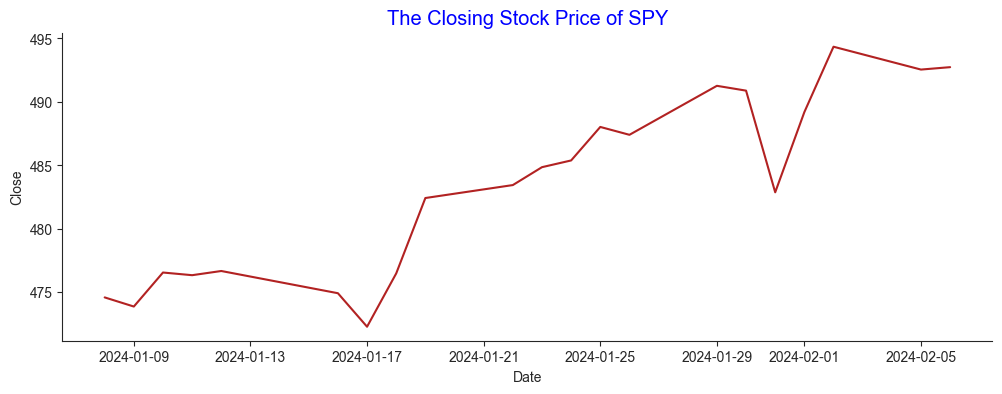

In [24]:
plt.figure(figsize=(12,4))
sns.set_style("ticks")
sns.lineplot(data=history,x="Date",y='Close',color='firebrick')
sns.despine()
plt.title("The Closing Stock Price of SPY",size='x-large',color='blue')

Text(0.5, 1.0, 'The Volume Data of SPY')

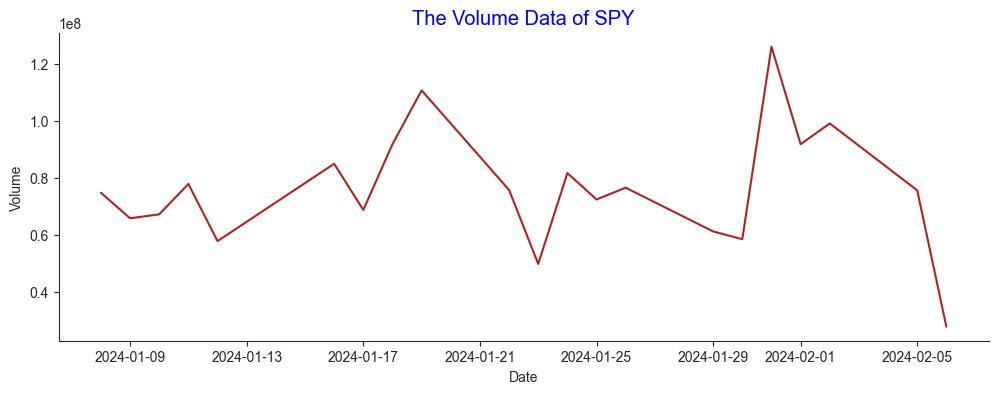

In [25]:
plt.figure(figsize=(12,4))
sns.set_style("ticks")
sns.lineplot(data=history,x="Date",y='Volume',color='firebrick')
sns.despine()
plt.title("The Volume Data of SPY",size='x-large',color='blue')

# Prediction Model

In [29]:
x_train = history['Date']
y_train = history['Close']

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

IndexError: tuple index out of range

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))
model.summary

IndexError: tuple index out of range

In [ ]:
# Evaluating Model